<br> MBAN:      Tom Schmidt
<br> Course:    Introduction to Machine Learning & AI - DAT-5329
<br> Professor: Chase Kusterer
<br> 
<br> A1: Unsupervised Analysis Project (Individual
<br> April 14th, 2024

In the topic of digital marketing, effective engagement on social media platforms like Facebook is crucial. This analysis focused on understanding how different types of content (photos, videos, texts) resonate with users in Thailand. Leveraging data-driven techniques such as Principal Component Analysis (PCA) and k-means clustering, I transformed user interactions into key metrics that define engagement levels and emotional responses.

This analysis revealed that photos are the most engaging content type, leading in 'Likes' reactions, indicating a strong visual appeal. Whereas videos are mainly dominant in receiving 'Love' and 'Wow' reactions, suggesting their impact in capturing user interest. Text posts, although only having a few strong emotional reactions, serve their niche effectively.

Further, through classification modeling, we identified the typical characteristics of content within each cluster, providing insights into what drives user engagement and the emotional undercurrents of reactions. Crucially, we assessed the accuracy of predictive models to minimize false positives and negatives misclassifications that could lead to ineffective targeting and missed opportunities.

For businesses, these insights are critical. They highlight the significance of aligning content to audience preferences, investing in high-quality visuals and understanding the balance between reaching out and overstepping, thereby optimizing resource allocation and maximizing market potential. This analysis provides a strategic roadmap for engaging with the digital landscape in Thailand, with potential to being applied to broader markets.

<h1> Introduction </h1>

In [413]:
# importing libraries
import numpy             as np  # mathematical essentials
import pandas            as pd  # data science essentials
import matplotlib.pyplot as plt # data viz
import seaborn           as sns # enhanced data viz
import phik                     # phi matrix and coefficient
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import linkage      # linkage
from scipy.cluster.hierarchy import dendrogram   # dendrogram
from sklearn.cluster import KMeans               # KMeans


# loading data
file = '/Users/ts/Desktop/M. Sc. Business Analytics/02_Modules/16_Introduction to Machine Learning & AI/01_Assignments/A1 - Unsupervised  Analysis Project. (Individual)/facebook_live_data.xlsx'
# calling this df_train
fb = pd.read_excel(io = file)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# checking dataset
fb.head(n = 15)

status_id status_type      time_published  num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys
0           1       photo 2023-07-04 22:45:00             0           0        150          0         0          0         0           0
1           2       photo 2023-06-23 01:01:00             2           3        202          7         1          0         0           0
2           3       photo 2023-06-21 02:23:00             4           0        200          8         1          0         0           0
3           4       video 2023-06-14 05:16:00           100          30        303         23         1          5         0           0
4           5       video 2023-06-08 08:28:00           173          47        132         16         1          0         1           0
5           6       photo 2023-06-03 08:40:00            15           1        221         12         1          0         0           0
6           7       video 2023-06-01 22:34:00             0           1         37          0         0          0         0           0
7           8       photo 2023-05-22 05:55:00             0           0         81          2         2          0         0           0
8           9       photo 2023-05-18 02:48:00             8           0        281         11         1          0         0           0
9          10       photo 2023-05-13 01:43:00            11           6         61          4         1          0         0           0
10         11       video 2023-04-29 08:23:00            60          11        114         13         0          0         0           1
11         12       video 2023-04-25 07:54:00            72          28        103         16         0          0         0           0
12         13       photo 2023-04-17 07:08:00             8           0        245         14         4          0         0           0
13         14       photo 2023-04-12 07:50:00            32           1        484         26         7          0         0           0
14         15       photo 2023-04-10 13:02:00             6           0        104          8         0          0         0           0

<h2> Data Preparation </h2>

In [414]:
fb.describe()

status_id                 time_published  num_comments   num_shares    num_likes    num_loves     num_wows    num_hahas     num_sads   num_angrys
count  2362.00000                           2362   2362.000000  2362.000000  2362.000000  2362.000000  2362.000000  2362.000000  2362.000000  2362.000000
mean   1181.50000  2022-01-17 21:45:45.673158144    233.729890    39.822185   221.147756    12.827265     1.282388     0.740051     0.260373     0.122777
min       1.00000            2017-09-27 02:58:00      0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000     0.000000
25%     591.25000            2021-03-25 16:10:15      0.000000     0.000000    17.000000     0.000000     0.000000     0.000000     0.000000     0.000000
50%    1181.50000            2023-01-28 04:36:30      4.000000     0.000000    57.000000     0.000000     0.000000     0.000000     0.000000     0.000000
75%    1771.75000            2023-05-17 11:30:30     23.000000     3.000000   186.000000     3.000000     0.000000     0.000000     0.000000     0.000000
max    2362.00000            2023-08-25 21:08:00  10960.000000  1260.000000  4315.000000   421.000000   278.000000   102.000000    46.000000    31.000000
std     681.99499                            NaN    856.359157   123.780440   467.312818    40.997534     8.718397     4.111450     1.842239     0.904222

In [415]:
fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status_id       2362 non-null   int64         
 1   status_type     2362 non-null   object        
 2   time_published  2362 non-null   datetime64[ns]
 3   num_comments    2362 non-null   int64         
 4   num_shares      2362 non-null   int64         
 5   num_likes       2362 non-null   int64         
 6   num_loves       2362 non-null   int64         
 7   num_wows        2362 non-null   int64         
 8   num_hahas       2362 non-null   int64         
 9   num_sads        2362 non-null   int64         
 10  num_angrys      2362 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 203.1+ KB


In [416]:
fb.isnull().sum(axis=0)

status_id         0
status_type       0
time_published    0
num_comments      0
num_shares        0
num_likes         0
num_loves         0
num_wows          0
num_hahas         0
num_sads          0
num_angrys        0
dtype: int64

<h1> Engagement Performances of Status Types </h1>

In [417]:
# create a new feature "total_engagement"

fb['total_engagement'] = fb['num_comments'] + fb['num_shares'] + fb['num_likes'] + fb['num_loves'] + fb['num_wows'] + fb['num_hahas'] + fb['num_sads'] + fb['num_angrys']

In [418]:
# creating visualizations with new feature "total_engagement"

# sample data
status_type = fb['status_type']
interactions = fb['total_engagement']

# creating the bar chart
plt.figure(figsize=(8, 4))  # set the size of the figure (optional)
plt.bar(status_type, interactions, color='blue')  # create a bar chart with blue bars

# adding title and labels
plt.title('Total Engagement by Status Type')
plt.xlabel('Status Type')
plt.ylabel('Interactions')

# display the chart
plt.show()

Checking engagement in specific reactions for all three status types (photo, video, text) and compare. Starting with number of comments and number of shares.  

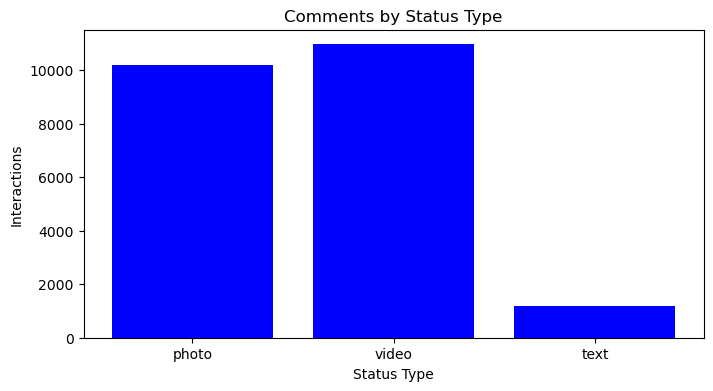

In [419]:
# creating visualizations with comments

# sample data
status_type = fb['status_type']
interactions = fb['num_comments']

# creating the bar chart
plt.figure(figsize=(8, 4))  
plt.bar(status_type, interactions, color='blue')  

# adding title and labels
plt.title('Comments by Status Type')
plt.xlabel('Status Type')
plt.ylabel('Interactions')

# display the chart
plt.show()

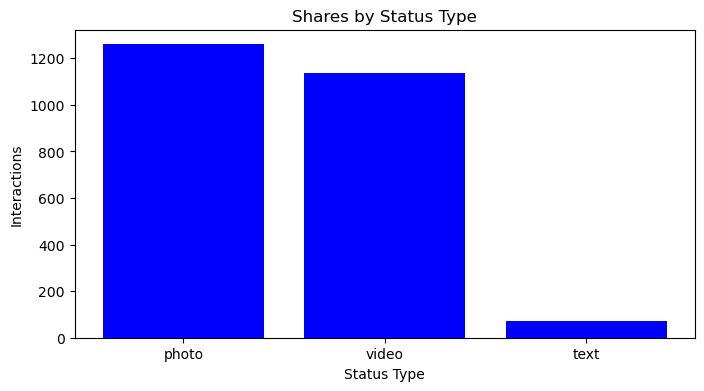

In [420]:
# creating visualizations with shares

# sample data
status_type = fb['status_type']
interactions = fb['num_shares']

# creating the bar chart
plt.figure(figsize=(8, 4))  
plt.bar(status_type, interactions, color='blue')  

# adding title and labels
plt.title('Shares by Status Type')
plt.xlabel('Status Type')
plt.ylabel('Interactions')

# display the chart
plt.show()

Further examining the number of likes and number of loves for each status type. 

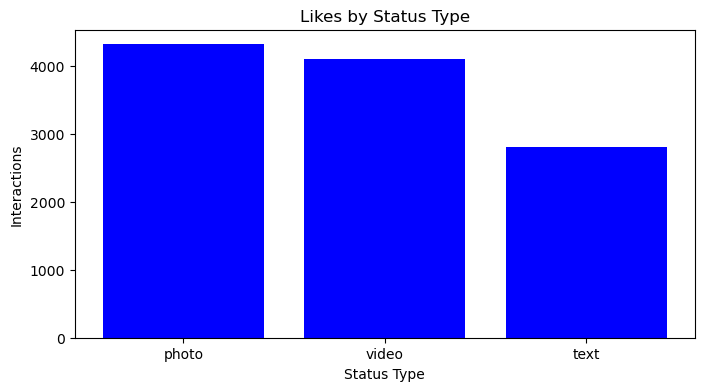

In [421]:
# creating visualizations with likes

# sample data
status_type = fb['status_type']
interactions = fb['num_likes']

# creating the bar chart
plt.figure(figsize=(8, 4))
plt.bar(status_type, interactions, color='blue')  

# adding title and labels
plt.title('Likes by Status Type')
plt.xlabel('Status Type')
plt.ylabel('Interactions')

# display the chart
plt.show()

In [422]:
# creating visualizations with loves

# sample data
status_type = fb['status_type']
interactions = fb['num_loves']

# creating the bar chart
plt.figure(figsize=(8, 4))  
plt.bar(status_type, interactions, color='blue')  

# adding title and labels
plt.title('Loves by Status Type')
plt.xlabel('Status Type')
plt.ylabel('Interactions')

# display the chart
plt.show()

Now comparing the number of wows and number of hahas.

In [423]:
# creating visualizations with wows

# sample data
status_type = fb['status_type']
interactions = fb['num_wows']

# creating the bar chart
plt.figure(figsize=(8, 4))  
plt.bar(status_type, interactions, color='blue')  

# adding title and labels
plt.title('Wows by Status Type')
plt.xlabel('Status Type')
plt.ylabel('Interactions')

# display the chart
plt.show()

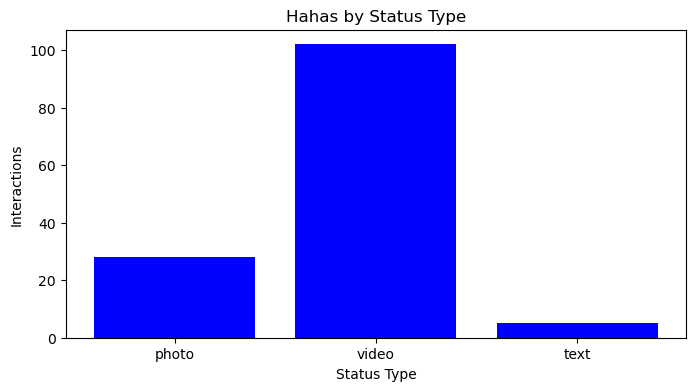

In [424]:
# creating visualizations with hahas

# sample data
status_type = fb['status_type']
interactions = fb['num_hahas']

# creating the bar chart
plt.figure(figsize=(8, 4))  
plt.bar(status_type, interactions, color='blue')  

# adding title and labels
plt.title('Hahas by Status Type')
plt.xlabel('Status Type')
plt.ylabel('Interactions')

# display the chart
plt.show()

Finally comparing the total number of sad and angry reactions for each status type. 

In [425]:
# creating visualizations with sads

# sample data
status_type = fb['status_type']
interactions = fb['num_sads']

# creating the bar chart
plt.figure(figsize=(8, 4))  # Set the size of the figure (optional)
plt.bar(status_type, interactions, color='blue')  # Create a bar chart with blue bars

# adding title and labels
plt.title('Sads by Status Type')
plt.xlabel('Status Type')
plt.ylabel('Interactions')

# display the chart
plt.show()

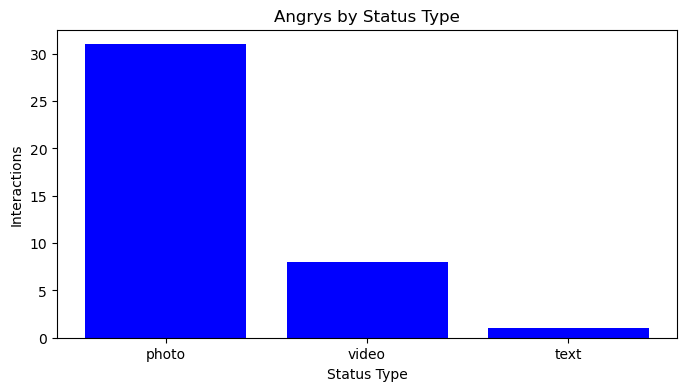

In [426]:
# creating visualizations with angrys

# sample data
status_type = fb['status_type']
interactions = fb['num_angrys']

# creating the bar chart
plt.figure(figsize=(8, 4))  
plt.bar(status_type, interactions, color='blue') 

# adding title and labels
plt.title('Angrys by Status Type')
plt.xlabel('Status Type')
plt.ylabel('Interactions')

# display the chart
plt.show()

Analysis of reactions and how photos perform compared to other forms of content:

Based on the bar charts above we can analyze the performance of photos compared to videos and texts in terms of user engagement. Photos appear to be in a close second place in total engagement as indicated in the first bar chart. They surpass texts by a large margin and are about 2,000 reactions in total behind videos. However, this can still be considered as a high level of engagement and the reason for it might be the visual nature of the content that tends to attract more immediate attention and interaction from users. 

Looking at comments and shares, the gap between photos and videos becomes even smaller. Comments are a deeper level of engagement than simple reactions and the provided dataset shows that photos stimulate conversation among users effectively. Shares is a reaction that occurs more with photos than with videos. This tendency suggests that this type of content resonates very well so that users want to spread it within their networks. 

Considering the likes and loves: Photos receive the highest amount of likes. This suggests that photos are the most appreciated content among users, possible due to their immediate visual appeal and easy way to consume. The number of loves is the highest for videos, tremendously higher than for photos. This may suggest that while users are engaged by video content, it does not quite elicit the deeper affection that photos do. 

Regarding the wows reactions the videos significantly outperform photos and texts. This suggests that video content is more impactful or surprising to the audience. The same goes for the haha reactions, indicating that videos are found more humorous or entertaining than other forms of content. It is noticeable that for both reactions, photos are just slightly higher than texts. 

Looking at the sad and angry reactions, it is the first time that photos outperform videos and texts by far, especially when it comes to angry reactions. This might be caused by the fact that photos have a stronger emotional impact on users, which can lead to expressions to empathy or sorrow. It is similar with angry reactions, indicating that certain photos provoke a stronger negative sentiment, most likely due to controversial or provocative subjects. 

<h1> Principal Components Analysis </h1>

In [427]:
# create user-defined functions used throughout this notebook

########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
    
    # adding a vertical line in red
    if cutoff is not None:            
        plt.axvline(x=cutoff, color='r', linestyle='--', label=f'Cutoff at PC{cutoff}')
        plt.legend()
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df

<h2> Develop PCA </h2>

In [428]:
# subsetting continuous data
fb_data = fb[ ['num_comments', 'num_shares', 'num_likes', 
               'num_loves', 'num_wows', 'num_hahas', 
               'num_sads', 'num_angrys'
              ]
            ]

In [429]:
# scaling variables before correlation analysis

fb_scaled = scaler(df = fb_data)

# check pre- and post-scaling variance
print(np.var(fb_data), '\n\n')
print(np.var(fb_scaled))

num_comments    733040.526533
num_shares       15315.110634
num_likes       218288.813477
num_loves         1680.086166
num_wows            75.978259
num_hahas           16.896863
num_sads             3.392409
num_angrys           0.817271
dtype: float64 


num_comments    1.0
num_shares      1.0
num_likes       1.0
num_loves       1.0
num_wows        1.0
num_hahas       1.0
num_sads        1.0
num_angrys      1.0
dtype: float64


/Users/ts/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


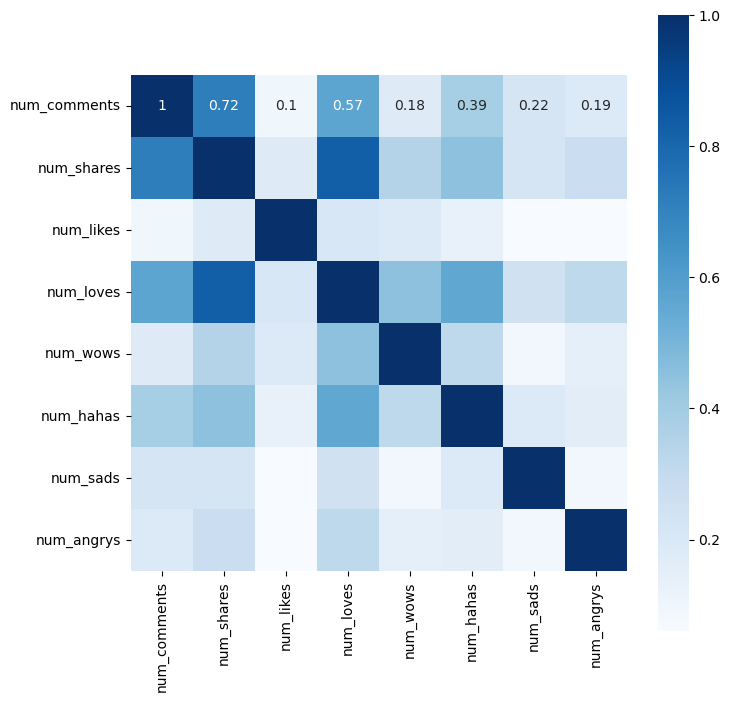

In [430]:
# developing a correlation heatmap of the scaled live data features

# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = fb_scaled.corr(method = 'pearson').round(decimals = 2)


# creating a correlation heatmap
sns.heatmap(data   = df_corr,
            cmap   = 'Blues',
            square = True,
            annot  = True)


# rendering the heatmap
plt.show()

Since only a few correlations have an absolute value above 0.50, the dataset is a good candidate for PCA. As such, it is possible to explain a high degree of variance with a small number of principal components. 

In [431]:
# developing the PCA

# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 702)


# FITTING and TRANSFORMING the scaled data
fb_pca = pca.fit_transform(fb_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", fb_scaled.shape)
print("PCA shape     :", fb_pca.shape)

Original shape: (2362, 8)
PCA shape     : (2362, 8)


In [432]:
pd.DataFrame(data = fb_pca)

0         1         2         3         4         5         6         7
0    -0.619670 -0.006476  0.031211 -0.028140  0.069438  0.030553  0.011254 -0.000399
1    -0.469623  0.126667  0.013848 -0.028868  0.082735 -0.020934 -0.053784 -0.088186
2    -0.469004  0.125796  0.015559 -0.028346  0.089355 -0.017813 -0.058132 -0.121798
3     0.367677  0.240069 -0.089732 -0.314233  0.234662  0.932251 -0.089207 -0.068756
4    -0.019679 -0.278149 -0.276109  0.109002  0.151739 -0.213950 -0.170986 -0.007108
...        ...       ...       ...       ...       ...       ...       ...       ...
2357 -0.430884  0.084652 -0.004706 -0.030780 -0.039773  0.007068 -0.111433 -0.051283
2358 -0.667096 -0.222189  0.133994 -0.100760  0.215334 -0.003407 -0.002229 -0.001872
2359 -0.668470 -0.228442  0.136973 -0.102865  0.219563 -0.004391 -0.002620 -0.001914
2360 -0.669158 -0.231568  0.138463 -0.103917  0.221677 -0.004884 -0.002815 -0.001936
2361 -0.667783 -0.225315  0.135484 -0.101812  0.217448 -0.003899 -0.002424 -0.001893

[2362 rows x 8 columns]

<h2> Evaluate PCA Algorithm </h2>

In [433]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(decimals = 3)}")

PC 1: 0.409
PC 2: 0.128
PC 3: 0.115
PC 4: 0.11
PC 5: 0.1
PC 6: 0.077
PC 7: 0.045
PC 8: 0.017


In [434]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum(axis = 0))

1.0


<h2> Scree Plot </h2>

In [435]:
# calling the scree_plot function
scree_plot(pca_object = pca)

<h2> Interpreting & Analyzing PCA </h2>

In [436]:
# visualize correlations between the original features and the principal components

# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7],
           ["PC 1", "PC 2", "PC 3", "PC 4", "PC 5", "PC 6", "PC 7", "PC 8"])

plt.xticks(range(0, 8),
           fb_scaled.columns,
           rotation=60,
           ha='left')

plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")


# displaying the plot
plt.show()

In [437]:
# INSTANTIATING a new model using the first three principal components
pca_3 = PCA(n_components = 3,
            random_state = 702)


# FITTING and TRANSFORMING the purchases_scaled
customer_pca_3 = pca_3.fit_transform(X = fb_scaled)

In [438]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(fb_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(fb_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                 0     1     2     3     4     5     6     7
num_comments  0.41 -0.31 -0.03 -0.20 -0.39 -0.18  0.67 -0.24
num_shares    0.49 -0.12  0.05 -0.17 -0.21 -0.22 -0.33  0.71
num_likes     0.16  0.73 -0.35  0.25 -0.49  0.11  0.05  0.00
num_loves     0.50  0.00  0.06 -0.08  0.01 -0.06 -0.56 -0.65
num_wows      0.30  0.48  0.08 -0.08  0.64 -0.42  0.29  0.04
num_hahas     0.37  0.01 -0.05 -0.20  0.28  0.84  0.14  0.12
num_sads      0.20 -0.35 -0.68  0.54  0.27 -0.09 -0.01  0.03
num_angrys    0.22 -0.04  0.63  0.72 -0.04  0.11  0.11  0.04


3 Components Factor Loadings
------------------------------
                 0     1     2
num_comments  0.41 -0.31 -0.03
num_shares    0.49 -0.12  0.05
num_likes     0.16  0.73 -0.35
num_loves     0.50  0.00  0.06
num_wows      0.30  0.48  0.08
num_hahas     0.37  0.01 -0.05
num_sads      0.20 -0.35 -0.68
num_angrys    0.22 -0.04  0.63



Interpreting each of the retained principal components:

PC 0: The positive side of this component is strongly associated with 'num_comments', 'num_shares' and 'num_loves'. Overall does this component have associations with every reaction. This suggests that a post is likely to have a higher level of active engagement, in which the users are not only viewing or liking the content but are also actively participating by commenting and sharing. On the other side, it could also indicate posts that have less active engagement. This component could be considered as "Active Engagement Score". It reflects both comments and shares, which are proactive forms of engagement on social media advertisements.  

PC 1: This component has a very strong correlation with positive 'num_likes' as well as with 'num_wows'. Also it is associated with the 'num_sads'. On the other side, there is no or only a little assocation with 'num_shares', 'num_loves', 'num_hahas' and 'num_angrys'. Thus, it is most likely to be a strongly polarizing post. PC 1 could therefore be considered as the "Popularity Score". Likes are the main indicator of popularity on social media. 

PC 2: This component indicates a strong negative association with 'num_sads' and positive association with 'num_angrys'. It could be an indicator for a post with a content that upsets the viewers or makes them feel sad. Looking at the number of comments, shares, loves, wows and hahas, it is noticeable that there are no close correlations. Thus, component PC 2 can be considered as "Sentiment Contrast Score".

In [439]:
# naming each principal component
factor_loadings_3.columns = ['Active Engagement Score', 
                           'Popularity Score',      
                           'Sentiment Contrast Score']   

# checking the result
factor_loadings_3.head(n=8).round(2)

Active Engagement Score  Popularity Score  Sentiment Contrast Score
num_comments                     0.41             -0.31                     -0.03
num_shares                       0.49             -0.12                      0.05
num_likes                        0.16              0.73                     -0.35
num_loves                        0.50              0.00                      0.06
num_wows                         0.30              0.48                      0.08
num_hahas                        0.37              0.01                     -0.05
num_sads                         0.20             -0.35                     -0.68
num_angrys                       0.22             -0.04                      0.63

<h1> Develop Segmentation with K-Means Clustering </h1>

Upon examination of the data through the scree plot in chapter 3, it was observed that the rate of decrease in explained variance significantly flattened after the third cluster. This elbow in the scree plot suggests that additional clusters beyond three would not contribute further valuable insights. Also, choosing three groups made sense because it split the data in a way that matches up well with different ways people interact on Facebook. This split helps us get a clearer picture of our audience and makes it easy to use this information for planning our marketing. 

In [440]:
# analyzing factor strengths per customer
factor_loadings = pca_3.transform(fb_scaled)


# converting to a DataFrame
factor_loadings_df = pd.DataFrame(data = factor_loadings)


# renaming columns
factor_loadings_df.columns = factor_loadings_3.columns

In [441]:
# applying the unsupervised_scaler function
pca_rescaled = scaler(df = factor_loadings_df )


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_rescaled))

Active Engagement Score     3.273609
Popularity Score            1.025052
Sentiment Contrast Score    0.916344
dtype: float64 


Active Engagement Score     1.0
Popularity Score            1.0
Sentiment Contrast Score    1.0
dtype: float64


/Users/ts/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Agglomarative clustering - testing three methods 'ward', 'average' and 'complete'

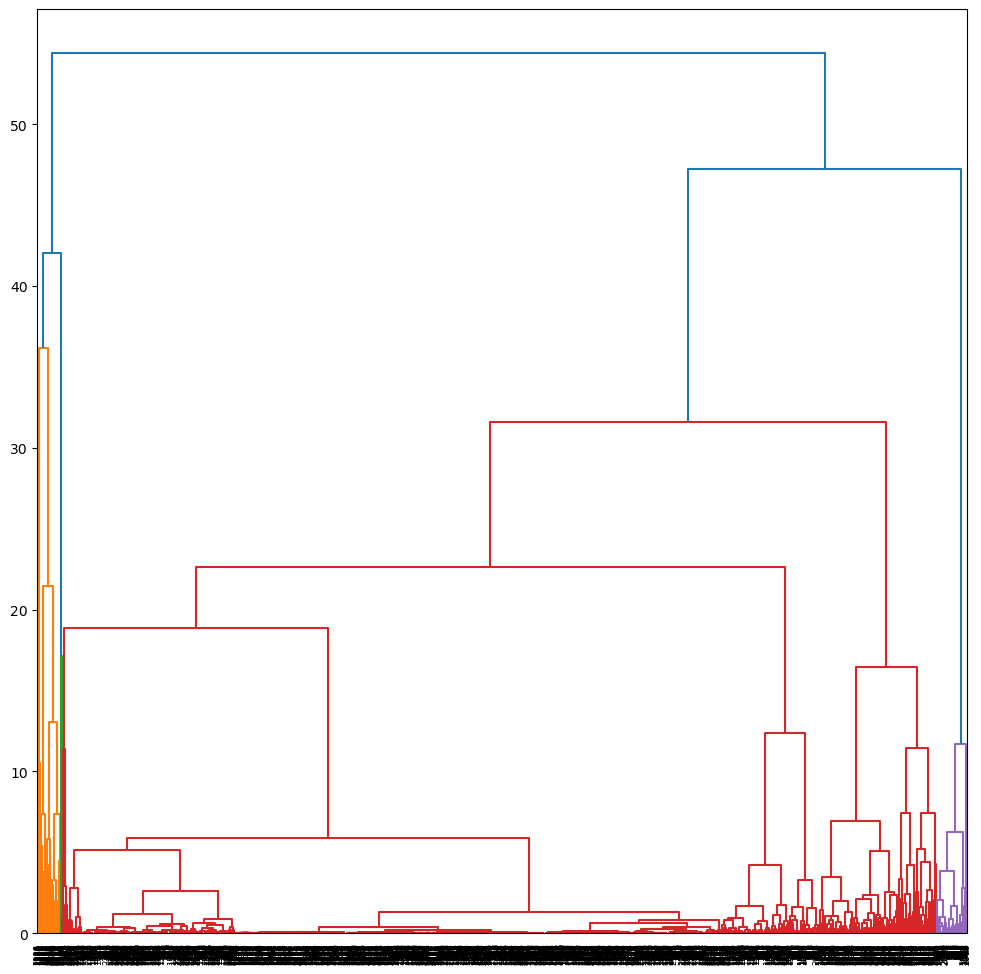

In [442]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_rescaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation  = 90       ,
           leaf_font_size = 6        )


# rendering the plot
plt.show()

In [443]:
# develop a k-Means model with x clusters

# INSTANTIATING a k-Means object with five clusters
fb_k_pca = KMeans(n_clusters   = 3    ,
                  n_init       = 'auto',
                  random_state = 702   )


# fitting the object to the data
fb_k_pca.fit(pca_rescaled)


# converting the clusters to a DataFrame
fb_kmeans_pca = pd.DataFrame({'Cluster': fb_k_pca.labels_})


# checking the results
print(fb_kmeans_pca.iloc[: , 0].value_counts())

Cluster
1    2138
0     135
2      89
Name: count, dtype: int64


In [444]:
# displaying the centroids (mean values) for each cluster

# storing cluster centers
centroids_pca = fb_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(data = centroids_pca).round(decimals = 2)


# renaming principal components
centroids_pca_df.columns = ['Engagement Intensity',
                           'Sentiment Polarization',      
                           'Light-Hearted Engagement']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(decimals = 2)

Engagement Intensity  Sentiment Polarization  Light-Hearted Engagement
0                  0.41                    2.94                     -1.09
1                 -0.18                   -0.13                      0.10
2                  3.77                   -1.40                     -0.78

In [445]:
# check the columns of fb
fb.columns

Index(['status_id', 'status_type', 'time_published', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'total_engagement'], dtype='object')

In [446]:
# concatenate status_type, time_published and PCA components into one DataFrame

# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([fb_kmeans_pca,
                         factor_loadings_df],
                         axis = 1)


# concatenating demographic information with pca-clusters
final_df = pd.concat([fb.loc[ : , ['status_type']],
                      clst_pca_df.round(decimals = 2)],
                      axis = 1)


# renaming columns
final_df.columns = ['status_type', 'Cluster',
                    'Engagement Intensity',
                    'Sentiment Polarization',      
                    'Light-Hearted Engagement']


# checking the results
print(final_df.head(n = 5))

  status_type  Cluster  Engagement Intensity  Sentiment Polarization  Light-Hearted Engagement
0       photo        1                 -0.62                   -0.01                      0.03
1       photo        1                 -0.47                    0.13                      0.01
2       photo        1                 -0.47                    0.13                      0.02
3       video        1                  0.37                    0.24                     -0.09
4       video        1                 -0.02                   -0.28                     -0.28


In [447]:
# dynamic string with value counts for each demographic (cluster 0)
cluster_id = 0  # cluster 1
cluster_filter = final_df['Cluster'] == cluster_id

print(f"""\
 -----------
| Cluster {cluster_id} |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df[cluster_filter]) / len(final_df), ndigits = 2)}


Centroids
---------
{clst_pca_df.loc[cluster_id].to_string(float_format="{:0.2f}".format, dtype=False, name=False)}


Status Type
-----------
{final_df.loc[cluster_filter, "status_type"]
         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
""")

 -----------
| Cluster 0 |
 -----------

Proportion of Observations
--------------------------
0.06


Centroids
---------
Cluster                     1.00
Active Engagement Score    -0.62
Popularity Score           -0.01
Sentiment Contrast Score    0.03


Status Type
-----------
status_type
photo    0.54
text     0.21
video    0.24



In [448]:
# dynamic string with value counts for each demographic (cluster 0)
cluster_id = 1  # cluster 2
cluster_filter = final_df['Cluster'] == cluster_id

print(f"""\
 -----------
| Cluster {cluster_id} |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df[cluster_filter]) / len(final_df), ndigits = 2)}


Centroids
---------
{clst_pca_df.loc[cluster_id].to_string(float_format="{:0.2f}".format, dtype=False, name=False)}


Status Type
-----------
{final_df.loc[cluster_filter, "status_type"]
         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
""")

 -----------
| Cluster 1 |
 -----------

Proportion of Observations
--------------------------
0.91


Centroids
---------
Cluster                     1.00
Active Engagement Score    -0.47
Popularity Score            0.13
Sentiment Contrast Score    0.01


Status Type
-----------
status_type
photo    0.64
text     0.06
video    0.30



In [449]:
# dynamic string with value counts for each demographic (cluster 0)
cluster_id = 2  # cluster 3
cluster_filter = final_df['Cluster'] == cluster_id

print(f"""\
 -----------
| Cluster {cluster_id} |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df[cluster_filter]) / len(final_df), ndigits = 2)}


Centroids
---------
{clst_pca_df.loc[cluster_id].to_string(float_format="{:0.2f}".format, dtype=False, name=False)}


Status Type
-----------
{final_df.loc[cluster_filter, "status_type"]
         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
""")

 -----------
| Cluster 2 |
 -----------

Proportion of Observations
--------------------------
0.04


Centroids
---------
Cluster                     1.00
Active Engagement Score    -0.47
Popularity Score            0.13
Sentiment Contrast Score    0.02


Status Type
-----------
status_type
photo    0.07
video    0.93



Cluster 0: It represents a very small proportion of observations with only 6% and it is characterized by a high Active Engagement Score. The Popularity Score and Sentiment Contrast Score are close to zero, leaving the insight that posts in this cluster have a neutral sentiment and an average popularity. Cluster 0 is dominated by photos, which make up over half of the posts. An example of a post for Cluster 0 could be a photo that triggers a high level of user interaction through comments and shares, caused by its compelling content. Something like an announcement or a call to action would belong to this cluster. 

Cluster 1: It contains the majority of the dataset with 91% of all observations. Compared to Cluster 1 it has a slightly smaller Active Engagement Score but a higher Popularity Score. The distribution of photos as a status type is even more dominant than in the first cluster, making up to 64%. A normal post for Cluster 1 could be a photo with a general appeal, such as a everyday life snapshot or standard marketing images, which receive a decent amount of likes and tend to be shared and commented too. 

Cluster 2: It is the smallest segment, making up only 4% of all observations. The scores are mainly similar to those of Cluster 1 but it is noticeable that in this cluster photos are only a minority with 7%. The rest, 93% are video posts. Therefore a normal post for Cluster 2 could be a video that achieves high views and some interactions like comments but does not lead to as much active engagement as the ones in Cluster 0.


Overall photos are a common form of content, indicating their importance in engagement on the platform and its value. Since they make up for the majority in the two biggest segments, it further underscores their relevance. 
These insights reveal the crucial role that photos play in user engagement at Facebook, especially when looking to maximize interaction. However, for content that aimes for high view counts and a moderate popularity, videos may be more effective. 

<h1> Developing Logistic Regression Models </h1>

In [450]:
# turning status_type into numeric (1 = photo, 0 = not photo)
fb['status_type_numeric'] = np.where(fb['status_type'] == 'photo', 1, 0)

# check results
fb.head(5)

status_id status_type      time_published  num_comments  num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  total_engagement  status_type_numeric
0          1       photo 2023-07-04 22:45:00             0           0        150          0         0          0         0           0               150                    1
1          2       photo 2023-06-23 01:01:00             2           3        202          7         1          0         0           0               215                    1
2          3       photo 2023-06-21 02:23:00             4           0        200          8         1          0         0           0               213                    1
3          4       video 2023-06-14 05:16:00           100          30        303         23         1          5         0           0               462                    0
4          5       video 2023-06-08 08:28:00           173          47        132         16         1          0         1           0               370                    0

In [451]:
# declaring the y_variable
y_variable = 'status_type_numeric'

<h2> Model 1: Original x-Features </h2>

In [452]:
# declaring x_features
x_features = ['status_id', 
              'status_type', 
              'time_published', 
              'num_comments', 
              'num_shares', 
              'num_likes', 
              'num_loves', 
              'num_wows', 
              'num_hahas', 
              'num_sads', 
              'num_angrys', 
              'total_engagement'
             ]

In [453]:
# import necessary libraries and packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

y_data = fb[y_variable]

# removing non-numeric columns and missing values
x_data = fb[x_features].copy().select_dtypes(include=[int, float]).dropna(axis = 1)

# storing remaining x_features after the step above
x_features = list(x_data.columns)

# train-test split (to validate the model)
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    )

# results of train-test split
print(f"""
Original Dataset Dimensions
---------------------------
Observations (Rows): {fb.shape[0]}
Features  (Columns): {fb.shape[1]}


Training Data (X-side)
----------------------
Observations (Rows): {x_train.shape[0]}
Features  (Columns): {x_train.shape[1]}


Training Data (y-side)
----------------------
Feature Name:        {y_train.name}
Observations (Rows): {y_train.shape[0]}


Testing Data (X-side)
---------------------
Observations (Rows): {x_test.shape[0]}
Features  (Columns): {x_test.shape[1]}


Testing Data (y-side)
---------------------
Feature Name:        {y_test.name}
Observations (Rows): {y_test.shape[0]}""")


Original Dataset Dimensions
---------------------------
Observations (Rows): 2362
Features  (Columns): 13


Training Data (X-side)
----------------------
Observations (Rows): 1771
Features  (Columns): 10


Training Data (y-side)
----------------------
Feature Name:        status_type_numeric
Observations (Rows): 1771


Testing Data (X-side)
---------------------
Observations (Rows): 591
Features  (Columns): 10


Testing Data (y-side)
---------------------
Feature Name:        status_type_numeric
Observations (Rows): 591


In [454]:
from sklearn.impute        import SimpleImputer
from sklearn.compose       import ColumnTransformer
from sklearn.pipeline      import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model  import LogisticRegression, RidgeClassifier
from sklearn.neighbors     import KNeighborsClassifier
from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics       import accuracy_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics       import precision_score, confusion_matrix

import sklearn
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics       import precision_score, confusion_matrix

# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver = 'lbfgs',
                                                 C = 1,
                                                 random_state = 702)

# FITTING the training data
model_fit = model.fit(x_train, y_train)

# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test)

# saving scoring data for future use
train_score = round(model_fit.score(x_train, y_train), ndigits = 4) # train accuracy
test_score  = round(model_fit.score(x_test, y_test),   ndigits = 4) # test accuracy
tt_gap      = round(abs(train_score - test_score),      ndigits = 4) # gap
roc_score   = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred) # test auc score

# displaying and saving the gap between training and testing
print(f"""\

Results for Classification Modeling with Original X-Features:

Training ACCURACY: {train_score}
Testing  ACCURACY: {test_score}
Train-Test Gap   : {tt_gap}
Test AUC Score   : {roc_score.round(decimals = 3)}
""") 


# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


Results for Classification Modeling with Original X-Features:

Training ACCURACY: 0.7555
Testing  ACCURACY: 0.7411
Train-Test Gap   : 0.0144
Test AUC Score   : 0.675


True Negatives : 90
False Positives: 133
False Negatives: 20
True Positives : 348



/Users/ts/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h2> Model 2: Retained Principal Components </h2>

In [455]:
from sklearn.metrics import roc_auc_score

# selecting x- and y-data
x_data1 = fb_pca
y_data1 = fb['status_type_numeric']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data1,
                                                    y_data1,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data1)

In [456]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test, y_test )
tt_gap    = round(abs(train_score - test_score),      ndigits = 4)
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


# displaying and saving the gap between training and testing
print(f"""\

Results for Classification Modeling with Principal Components:

Training ACCURACY: {train_score}
Testing  ACCURACY: {test_score}
Train-Test Gap   : {tt_gap}
Test AUC Score   : {roc_score.round(decimals = 3)}
""") 

# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


Results for Classification Modeling with Principal Components:

Training ACCURACY: 0.7555
Testing  ACCURACY: 0.7411
Train-Test Gap   : 0.0144
Test AUC Score   : 0.678


True Negatives : 91
False Positives: 139
False Negatives: 14
True Positives : 347



<h2> Model 3: Retained Clusters </h2> 

In [457]:
# factorizing cluster results 
cluster_df = pd.get_dummies(data       = fb_kmeans_pca['Cluster'],
                            drop_first = True).astype(dtype = int)

# checking results
cluster_df.value_counts(normalize = False).sort_index(ascending = False)

1  2
1  0    2138
0  1      89
   0     135
Name: count, dtype: int64

In [458]:
# selecting x- and y-data
x_data2 = cluster_df
y_data2 = fb['status_type_numeric']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data2,
                                                    y_data2,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data2)

In [459]:
# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
tt_gap      = round(abs(train_score - test_score),      ndigits = 4)
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


# displaying and saving the gap between training and testing
print(f"""\

Results for Classification Modeling with Clusters:

Training ACCURACY: {train_score}
Testing  ACCURACY: {test_score}
Train-Test Gap   : {tt_gap}
Test AUC Score   : {roc_score.round(decimals = 3)}
""")

# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


Results for Classification Modeling with Clusters:

Training ACCURACY: 0.7555
Testing  ACCURACY: 0.7411
Train-Test Gap   : 0.0144
Test AUC Score   : 0.527


True Negatives : 15
False Positives: 215
False Negatives: 4
True Positives : 357



<h1> Best Model Analysis </h1>

Selected as the best model: "Model 2: Retained Principal Components"

It has the highest AUC score out of the three modes, indicating the best model performance, particularly when it comes to distinguishing between positive and negative classes. The AUC score further is reliable when there are classes with significant imbalance, as we experience in this analysis. The accuracy scores can be misleading in those cases. The AUC score of 0.678 suggests effectiveness and robustness for "Model 2: Retained Principal Components". 

The confusion matrix with 91 TN, 139 FP, 14 FN and 347 TP shows that there are still lots of wrongly predicted observations. The number of False Positives, in our cased wrongly predicted as a photo despite it not being a photo is very high with 139. This error could lead to serious risks for the business such as a misallocation of resources like budget and manpower on uninterested customers or prospects. Thinking that the good and engaging interactions to their advertising is based on their chosen status type photo when it is actually caused by videos or something else is risky. 

The number of False Negatives (14) is relatively small compared to the first error. It means, that observations are predicted as "not photo" despite it being a photo. Since it is a small number, this kind of error is not as dangerous as the other one but a higher number of False Negatives would lead to missed opportunities as FN represents them. If a model fails to identify a positive instance, the business misses out on potential sales, leads, conversions etc. 